In [119]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import csv

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [120]:
X_txt_train = [] 
ytrain = [] 

with open('final2.csv', encoding="utf8") as tweetfile:
    tweets = csv.reader(tweetfile,delimiter=',')
    for row in tweets:
        X_txt_train.append(row[5])
        ytrain.append(row[0])
        
tweetfile.close()


X_txt_train = np.array(X_txt_train) 
ytrain = np.array(ytrain)

len(X_txt_train)

8624

In [121]:
vec = CountVectorizer(ngram_range=(1,4), stop_words='english') #unigrams and bigrams)
X_txt = vec.fit_transform(X_txt_train)

In [122]:
import scipy.sparse as sp
from scipy.sparse import hstack
import numpy as np
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X_txt_train, ytrain, test_size=.2,random_state=123) # 80/20 percent split

X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)
print(X_train_vec.shape)
print(X_test_vec.shape)

(6899, 128397)
(1725, 128397)


In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score
from warnings import filterwarnings
filterwarnings('ignore') #turning off convergence warnings because they are annoying!

# all target words, offensive ci, and pos/neg lexicon

svc = LinearSVC() 
parameters = {'C':[0.01, 0.1, 1,10]}
clf = GridSearchCV(svc, parameters, cv=5, scoring = "f1_macro")
clf.fit(X_train_vec,y_train)

print(clf.best_params_)

preds = clf.predict(X_test_vec)
macrof1 = f1_score(y_test, preds,average = 'macro')
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average = 'macro') 
recall = recall_score(y_test, preds, average = 'macro') 
microf1 = f1_score(y_test, preds, average = 'micro')
print('All targets f1 macro score:', macrof1)
print("f1 micro: {:.4f}".format(microf1))
print("accuracy: {}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))

{'C': 1}
All targets f1 macro score: 0.6709686087051712
f1 micro: 0.7333
accuracy: 0.7333333333333333
Precision: 0.6761
Recall: 0.6671


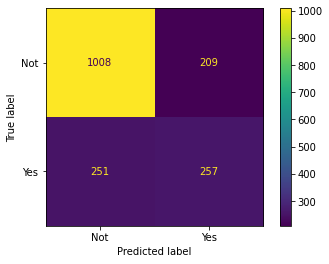

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [105]:
num_tweets = 0
for pred, y, txt in zip(preds, y_test, X_test):
    
    print("Card Text: {}".format(txt))
    print("Ground-Truth Class: {}".format(y))
    print("Prediction: {}".format(pred))
    print()
  
    num_tweets += 1
    if num_tweets == 5:
        
        break

Card Text: Equipped creature gets +6/+6.
Whenever equipped creature attacks, destroy target permanent.
Equip {6}
Ground-Truth Class: Yes
Prediction: Yes

Card Text: Enchant creature
Enchanted creature has "Whenever this creature attacks, it deals X damage to defending player, where X is the number of cards in their hand."
When Unquenchable Fury is put into your graveyard from the battlefield, return it to your hand.
Ground-Truth Class: Not
Prediction: Not

Card Text: Return target creature to its owner's hand.
Ground-Truth Class: Yes
Prediction: Not

Card Text: At the beginning of your upkeep, sacrifice Solitary Confinement unless you discard a card.
Skip your draw step.
You have shroud. (You can't be the target of spells or abilities.)
Prevent all damage that would be dealt to you.
Ground-Truth Class: Yes
Prediction: Not

Card Text: Flying
When Riftwing Cloudskate enters the battlefield, return target permanent to its owner's hand.
Suspend 3—{1}{U} (Rather than cast this card from you

### Count vectorizor

prints the top n terms in a the text column matrix

- With single terms creature and target are the top two most frequent
- With bigrams only "enters battlefield" and "end turn" appear most frequently
- Finally with trigrams "gets end turn" and "deals damage target", "Target creature gets"

Maybe print the average ranking that these terms appear in along with a probability that they are in the top 30%

In [171]:
X_color_check = []

with open('final2.csv', encoding="utf8") as tweetfile:
    tweets = csv.reader(tweetfile,delimiter=',')
    for row in tweets:
         X_color_check.append(row[5])
        
tweetfile.close()

X_color_check = np.array(X_color_check) 


len(X_color_check)

2548

In [172]:

def get_top_n_words(corpus, n=None, n_grams1=1, n_grams2=1):

    #vec = CountVectorizer(ngram_range=(n_grams1,n_grams2)).fit(corpus)
    vec = CountVectorizer(ngram_range=(n_grams1,n_grams2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [173]:
get_top_n_words(X_color_check, 10,2,3)

[('enters battlefield', 733),
 ('battlefield tapped', 306),
 ('draw card', 287),
 ('target creature', 269),
 ('end turn', 238),
 ('enters battlefield tapped', 228),
 ('creature control', 203),
 ('search library', 202),
 ('creatures control', 163),
 ('card graveyard', 161)]